# Lab 1 – The Basics of Python and Pytorch

Jialun Shen

16307110030

1. Write a Python function that takes a list and returns a new list with unique elements of the first list.
e.g.,

Input:[1, 2, 3, 3, 3, 3, 4, 5].

Output: [1, 2, 3, 4, 5].

In [1]:
from typing import List

def unique_list(lst: List) -> List:
    return list(set(lst))

xlst = [1, 2, 3, 3, 3, 3, 4, 5]
ylst = unique_list(xlst)
print(ylst)

[1, 2, 3, 4, 5]


2. Write a Python function that checks whether a passed string is palindrome or not. A palindrome is a word,
phrase, or sequence that reads the same backward as forward. For example, both “madam” and “nurses run”
are palindromes.

In [2]:
def is_palindrome(s: str) -> bool:
    s = "".join(s.split())
    return s == s[::-1]

print(is_palindrome("madam"))
print(is_palindrome("nurses run"))
print(is_palindrome("apple"))

True
True
False


3. Write a NumPy program to find the real and imaginary parts of an array of complex numbers. e.g.,

Input: array [1.00000000+0.j 0.70710678+0.70710678j]

Output: array [[1, 0], [0.70710678, 0.70710678]]

In [3]:
import numpy as np

def split_real_imaginary(arr: np.array) -> np.array:
    real = np.real(arr)
    imag = np.imag(arr)
    return np.array([real, imag]).transpose()

split_real_imaginary(np.array([1.00000000+0.j, 0.70710678+0.70710678j, 123+456j]))

array([[  1.        ,   0.        ],
       [  0.70710678,   0.70710678],
       [123.        , 456.        ]])

4. Write a Python program to add two binary numbers.
e.g.,

Input : (’11’, ’1’)

Output : 100


In [4]:
def binary_add(num1: str, num2: str) -> str:
    result_str = bin(int(num1, 2) + int(num2, 2))  # '0bxxx'
    return result_str[2::]

binary_add('11', '1')

'100'

5. You are given two non-empty linked lists representing two non-negative integers. The digits are stored in
reverse order and each of their nodes contain a single digit. Add the two numbers and return it as a linked
list. You may assume the two numbers do not contain any leading zero, except the number 0 itself.
e.g.,

Input: (2 -> 4 -> 3) + (5 -> 6 -> 4)

Output: 7 -> 0 -> 8

Explanation: 342 + 465 = 807.

Linked list is defined as follow
```
# Definition for singly-linked list.
# class ListNode:
    # def __init__(self, x):
        # self.val = x
        # self.next = None
```

In [5]:
class ListNode:
    def __init__(self, x):
        assert type(x) is int and 0 <= x <= 9, "x must be an integer in [0-9]"
        self.val = x
        self.next = None

    def print_list(self):
        tmp = self
        while tmp:
            print(tmp.val, end=" -> " if tmp.next else "\n")
            tmp = tmp.next


def make_linked_list(num: int) -> ListNode:
    assert type(num) is int and num > 0, "must be non-negative integer!"
    head_node = last_node = None
    while num > 0:
        digit = num % 10
        num = num // 10
        digit_node = ListNode(digit)
        if last_node:
            last_node.next = digit_node
        else:
            head_node = digit_node
        last_node = digit_node
    return head_node


xhead = make_linked_list(123456)
xhead.print_list()

6 -> 5 -> 4 -> 3 -> 2 -> 1


In [6]:
def add_linked_list(head1: ListNode, head2: ListNode) -> ListNode:
    fake_result = ListNode(0)
    tmp = fake_result
    carry = False  # 是否进位
    # 两个数字均有数时
    while head1 and head2:
        val = head1.val + head2.val
        if carry:  # 进位
            val += 1
        if val >= 10:
            carry = True
            val = val % 10
        else:
            carry = False
        tmp.next = ListNode(val)
        tmp = tmp.next
        head1 = head1.next
        head2 = head2.next
    # 至少一个没数时
    if head1 and not head2:  # 数1较长
        while head1:
            val = head1.val
            if carry: val += 1
            if val >= 10:
                carry = True
                val = val % 10
            else:
                carry = False
            tmp.next = ListNode(val)
            tmp = tmp.next
            head1 = head1.next
    elif head2 and not head1:  # 数2较长
        while head2:
            val = head2.val
            if carry: val += 1
            if val >= 10:
                carry = True
                val = val % 10
            else:
                carry = False
            tmp.next = ListNode(val)
            tmp = tmp.next
            head2 = head2.next
    # 遗留的carry
    if carry:
        tmp.next = ListNode(1)

    return fake_result.next


def test_add_list(x, y):
    print("======")
    print("{} + {} = {}".format(x, y, x+y))
    xhead = make_linked_list(x)
    xhead.print_list()
    yhead = make_linked_list(y)
    yhead.print_list()
    x_plus_y = add_linked_list(xhead, yhead)
    x_plus_y.print_list()

test_add_list(342, 465)
test_add_list(1805296, 114514)
test_add_list(999, 2)

342 + 465 = 807
2 -> 4 -> 3
5 -> 6 -> 4
7 -> 0 -> 8
1805296 + 114514 = 1919810
6 -> 9 -> 2 -> 5 -> 0 -> 8 -> 1
4 -> 1 -> 5 -> 4 -> 1 -> 1
0 -> 1 -> 8 -> 9 -> 1 -> 9 -> 1
999 + 2 = 1001
9 -> 9 -> 9
2
1 -> 0 -> 0 -> 1


6. Implement quick sort

In [7]:
# quick sort = partition-exchange sort
# ref:
# https://www.runoob.com/w3cnote/quick-sort.html
# https://www.runoob.com/python3/python-quicksort.html
# https://blog.csdn.net/weixin_43250623/article/details/88931925

def quick_sort(lst, start, end):
    """
    快速排序
    :param lst: 排序数组
    :param low: 起始索引
    :param high: 结束索引
    :return:
    """
    if start >= end:  # 递归的退出条件
        return
    pivot = lst[start]  # 设定起始的基准元素
    low = start  # low为序列左边在开始位置的由左向右移动的游标 ->
    high = end  # high为序列右边末尾位置的由右向左移动的游标 <-
    while low < high:
        # 如果low与high未重合，high(右边)指向的元素大于等于基准元素，则high向左移动
        while low < high and lst[high] >= pivot:
            high -= 1
        lst[low] = lst[high]  # 走到此位置时high指向一个比基准元素小的元素,将high指向的元素放到low的位置上,此时high指向的位置空着,接下来移动low找到符合条件的元素放在此处
        # 如果low与high未重合，low指向的元素比基准元素小，则low向右移动
        while low < high and lst[low] < pivot:
            low += 1
        lst[high] = lst[low]  # 此时low指向一个比基准元素大的元素,将low指向的元素放到high空着的位置上,此时low指向的位置空着,之后进行下一次循环,将high找到符合条件的元素填到此处
    # 退出循环后，low与high重合，此时所指位置为基准元素的正确位置,左边的元素都比基准元素小,右边的元素都比基准元素大
    lst[low] = pivot  # 将基准元素放到该位置,
    # 对基准元素左边的子序列进行快速排序
    quick_sort(lst, start, low - 1)  # start :0  low -1 原基准元素靠左边一位
    # 对基准元素右边的子序列进行快速排序
    quick_sort(lst, low + 1, end)  # low+1 : 原基准元素靠右一位  end: 最后

def test_quick_sort(arr):
    n = len(arr)
    print("before: {}".format(arr))
    quick_sort(arr, 0, n-1)
    print("after: {}".format(arr))

arr = np.random.randint(0, 1000, size=10, dtype=int).tolist()
test_quick_sort(arr)

before: [565, 948, 73, 7, 623, 873, 732, 19, 484, 95]
after: [7, 19, 73, 95, 484, 565, 623, 732, 873, 948]


7. Implement shell sort

In [8]:
# ref:
# https://blog.csdn.net/weixin_41678663/article/details/81811950
# https://m.runoob.com/data-structures/shell-sort.html

def shell_sort(lst: List[int]):
    """
    希尔排序
    :param lst: 排序数组
    :return:
    """
    n = len(lst)
    gap = n // 2
    while gap >= 1:
        # j是需要比较的次数
        for j in range(gap, n):   # 3---7
            # i 是需要控制的索引
            i = j
            # 比较的逻辑和控制i的变换的逻辑
            while (i - gap) >= 0:
                if lst[i] < lst[i-gap]:
                    # 交换
                    lst[i], lst[i-gap] = lst[i-gap], lst[i]
                    # 修改i
                    i -= gap
                else:
                    break
        # 控制间隙的变化
        gap //= 2


def test_shell_sort(arr):
    print("before: {}".format(arr))
    shell_sort(arr)
    print("after: {}".format(arr))

arr = np.random.randint(0, 1000, size=10, dtype=int).tolist()
test_shell_sort(arr)

before: [117, 234, 464, 776, 944, 601, 103, 573, 852, 633]
after: [103, 117, 234, 464, 573, 601, 633, 776, 852, 944]


8. Implement linear regression model and use autograd to optimize it by Pytorch.

epoch: 100, loss: 0.1300
epoch: 200, loss: 0.1123
epoch: 300, loss: 0.1015
epoch: 400, loss: 0.0948
epoch: 500, loss: 0.0907
epoch: 600, loss: 0.0882
epoch: 700, loss: 0.0867
epoch: 800, loss: 0.0858
epoch: 900, loss: 0.0852
epoch: 1000, loss: 0.0848


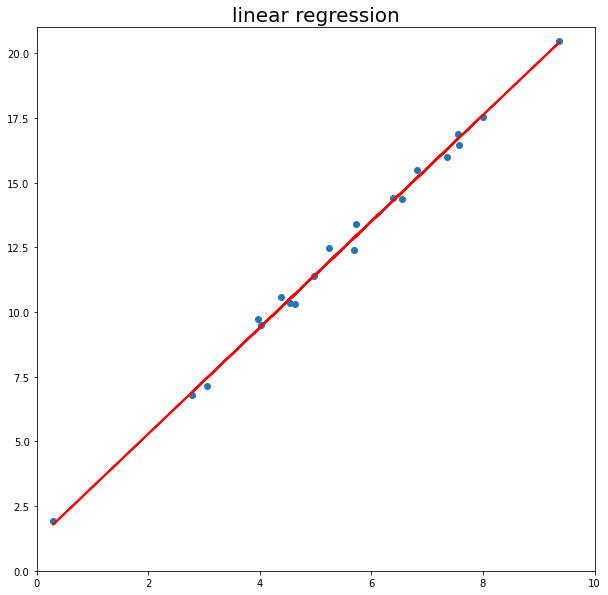

In [9]:
# ref:
# https://blog.csdn.net/mbshqqb/article/details/115051553

import torch
import matplotlib.pyplot as plt

torch.manual_seed(1)

# hyperparameters
n = 20  # number of data
lr = 1e-2  # learning rate
num_epoch = 1000

# generate fake data
x = torch.rand(n, 1) * 10
y = 2 * x + 1 + torch.rand(n, 1)

# y = w * x + b
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

# train
for iteration in range(1, num_epoch + 1):
    if w.grad is not None:
        w.grad.zero_()
    if b.grad is not None:
        b.grad.zero_()
    y_hat = w * x + b
    loss = ((y - y_hat) ** 2).mean() # MSE loss
    loss.backward()
    w = (w - lr * w.grad).detach().requires_grad_()
    b = (b - lr * b.grad).detach().requires_grad_()
    # print loss
    if iteration % 100 == 0:
        print("epoch: {}, loss: {:.4f}".format(iteration, loss.data.numpy()))
    # early stop
    if loss.data.numpy() < 1e-5:
        break

# plot
plt.figure(figsize=(10, 10))
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), y_hat.data.numpy(), 'r-', lw=2)
plt.title("linear regression", size=20)
plt.xlim(0, 10)
plt.ylim(0, 21)
plt.show()

9. Implement logistic regression model and use autograd to optimize it by Pytorch.

epoch: 100, loss: 0.6323
epoch: 200, loss: 0.5503
epoch: 300, loss: 0.4867
epoch: 400, loss: 0.4366
epoch: 500, loss: 0.3966
epoch: 600, loss: 0.3641
epoch: 700, loss: 0.3372
epoch: 800, loss: 0.3147
epoch: 900, loss: 0.2957
epoch: 1000, loss: 0.2793


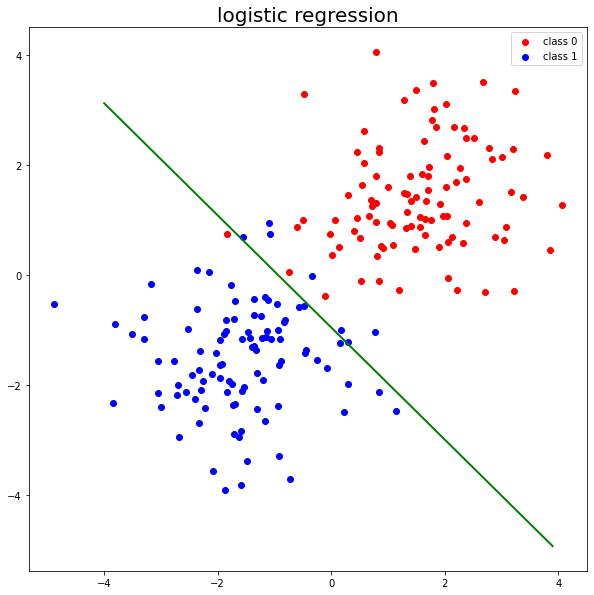

In [10]:
# ref:
# https://blog.csdn.net/qq_37534947/article/details/108179408
# https://blog.csdn.net/varyshare/article/details/99056101

torch.manual_seed(1)

# hyperparameters
n = 100  # number of data
lr = 1e-3  # learning rate
num_epoch = 1000

# generate fake data
dim = 2  # dimension of x
mu = 1.5  # the mean of x, x ~ Normal(mu, sigma^2)
sigma = 1  # the std of x, x ~ Normal(mu, sigma^2)
n_data = torch.ones(n, dim)  # the structure of data
x1 = torch.normal(mean=mu * n_data, std=sigma)
y1 = torch.ones(n)  # positive samples
x2 = torch.normal(mean=-mu * n_data, std=sigma)
y2 = torch.zeros(n)
x = torch.cat((x1, x2), dim=0)  # shape = (200, 2)
y = torch.cat((y1, y2), dim=0)  # shape = 200

# y = sigmoid(w^T x + b) = 1/(1 + exp(-(wx+b)))
w = torch.tensor(np.random.normal(0, 0.01, size=(dim, 1)), requires_grad=True, dtype=torch.float32)
b = torch.rand(1, requires_grad=True, dtype=torch.float32)

# train
for iteration in range(1, num_epoch + 1):
    if w.grad is not None:
        w.grad.zero_()
    if b.grad is not None:
        b.grad.zero_()
    y_hat = (1 / (1 + torch.pow(np.e, - torch.mm(x, w) - b))).squeeze()
    # print("yhat", y_hat.shape)
    loss = (-y.mul(torch.log(y_hat)) - (1 - y).mul(torch.log(1 - y_hat))).mean()  # cross entropy loss
    loss.backward()
    w = (w - lr * w.grad).detach().requires_grad_()
    b = (b - lr * b.grad).detach().requires_grad_()
    # print loss
    if iteration % 100 == 0:
        print("epoch: {}, loss: {:.4f}".format(iteration, loss.data.numpy()))
    # early stop
    if loss.data.numpy() < 1e-5:
        break

# plot
plt.figure(figsize=(10, 10))
plt.scatter(x1.data.numpy()[:, 0], x1.data.numpy()[:, 1], c='r', label="class 0")
plt.scatter(x2.data.numpy()[:, 0], x2.data.numpy()[:, 1], c='b', label="class 1")
# line: w1x1 + w2x2 + b = 0 -> x2 = -(w1x1 + b) / w2
w1 = float(w.data.numpy()[0])
w2 = float(w.data.numpy()[1])
b = float(b.data.numpy())
plot_x = np.arange(-4, 4, 0.1)
plot_y = -(w1 * plot_x + b) / w2
plt.plot(plot_x, plot_y, 'g-', lw=2)
plt.title("logistic regression", size=20)
plt.legend()
plt.show()

10. Implement linear SVM model for binary classification task and use autograd to optimize it by Pytorch.

Hint: you may use the loss of
$
\sum \max [0, 1 − y (wx + b)]
$

epoch: 100, loss: 0.6977
epoch: 200, loss: 0.5976
epoch: 300, loss: 0.5739
epoch: 400, loss: 0.5622
epoch: 500, loss: 0.5546
epoch: 600, loss: 0.5491
epoch: 700, loss: 0.5443
epoch: 800, loss: 0.5401
epoch: 900, loss: 0.5368
epoch: 1000, loss: 0.5335


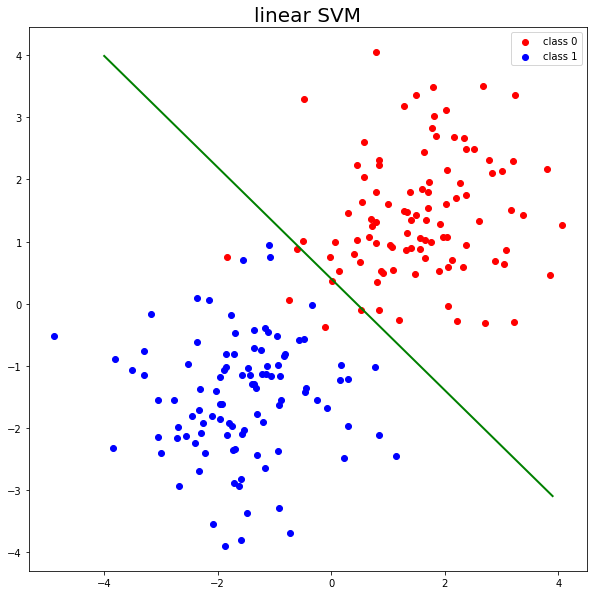

In [11]:
# ref:
# https://www.jianshu.com/p/5e33210a1274

torch.manual_seed(1)

# hyperparameters
n = 100  # number of data
lr = 5e-3  # learning rate
num_epoch = 1000

# generate fake data
dim = 2  # dimension of x
mu = 1.5  # the mean of x, x ~ Normal(mu, sigma^2)
sigma = 1  # the std of x, x ~ Normal(mu, sigma^2)
n_data = torch.ones(n, dim)  # the structure of data
x1 = torch.normal(mean=mu * n_data, std=sigma)
y1 = torch.ones(n)  # positive samples
x2 = torch.normal(mean=-mu * n_data, std=sigma)
y2 = torch.zeros(n)
x = torch.cat((x1, x2), dim=0)  # shape = (200, 2)
y = torch.cat((y1, y2), dim=0)  # shape = 200

# y = sigmoid(w^T x + b) = 1/(1 + exp(-(wx+b)))
w = torch.tensor(np.random.normal(0, 0.01, size=(dim, 1)), requires_grad=True, dtype=torch.float32)
b = torch.rand(1, requires_grad=True, dtype=torch.float32)

# train
for iteration in range(1, num_epoch + 1):
    if w.grad is not None:
        w.grad.zero_()
    if b.grad is not None:
        b.grad.zero_()
    y_hat = (torch.mm(x, w) - b).squeeze()
    loss = torch.mean(torch.clamp(1 - y * y_hat, min=0))  # hinge loss
    loss.backward()
    w = (w - lr * w.grad).detach().requires_grad_()
    b = (b - lr * b.grad).detach().requires_grad_()
    # print loss
    if iteration % 100 == 0:
        print("epoch: {}, loss: {:.4f}".format(iteration, loss.data.numpy()))
    # early stop
    if loss.data.numpy() < 1e-5:
        break

# plot
plt.figure(figsize=(10, 10))
plt.scatter(x1.data.numpy()[:, 0], x1.data.numpy()[:, 1], c='r', label="class 0")
plt.scatter(x2.data.numpy()[:, 0], x2.data.numpy()[:, 1], c='b', label="class 1")
# line: w1x1 + w2x2 + b = 0 -> x2 = -(w1x1 + b) / w2
w1 = float(w.data.numpy()[0])
w2 = float(w.data.numpy()[1])
b = float(b.data.numpy())
plot_x = np.arange(-4, 4, 0.1)
plot_y = -(w1 * plot_x + b) / w2
plt.plot(plot_x, plot_y, 'g-', lw=2)
plt.title("linear SVM", size=20)
plt.legend()
plt.show()

11. Add a Frobenius norm penalty for the weight w in your SVM model by two different ways: (1) use a pytorch
function to calculate the norm; (2) implement the code by yourself.

Hint: Frobenius norm of a matrix $A$ is
$
||A||_F = \left(\sum_{i=1}^n\sum_{j=1}^m|a_{ij}|^2\right)^{\frac{1}{2}}
$

epoch: 100, loss: 0.7754
epoch: 200, loss: 0.6303
epoch: 300, loss: 0.5971
epoch: 400, loss: 0.5790
epoch: 500, loss: 0.5702
epoch: 600, loss: 0.5631
epoch: 700, loss: 0.5578
epoch: 800, loss: 0.5529
epoch: 900, loss: 0.5485
epoch: 1000, loss: 0.5451


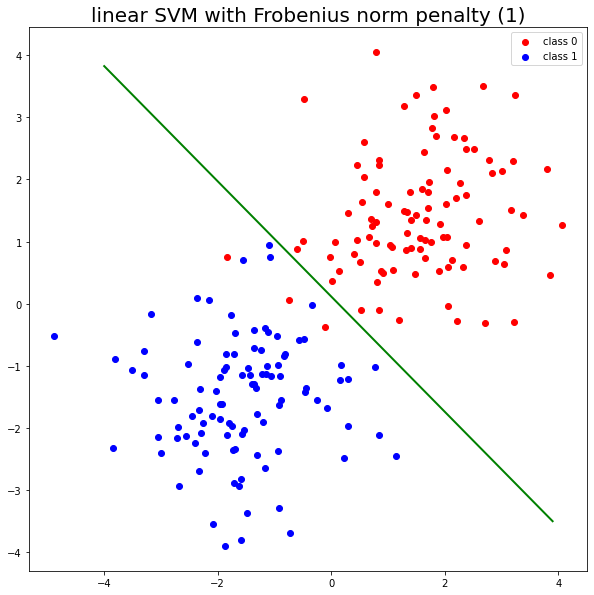

In [12]:
torch.manual_seed(1)

lr = 5e-3  # learning rate

# (1) use a pytorch function to calculate the norm
def loss_fn_1(y, y_hat, w, k=0.001):
    hinge_loss = torch.mean(torch.clamp(1 - y * y_hat, min=0))
    norm = torch.norm(w)
    return hinge_loss + k * norm

w = torch.tensor(np.random.normal(0, 0.01, size=(dim, 1)), requires_grad=True, dtype=torch.float32)
b = torch.rand(1, requires_grad=True, dtype=torch.float32)

# train
for iteration in range(1, num_epoch + 1):
    if w.grad is not None:
        w.grad.zero_()
    if b.grad is not None:
        b.grad.zero_()
    y_hat = (torch.mm(x, w) - b).squeeze()
    loss = loss_fn_1(y, y_hat, w)  # hinge loss
    loss.backward()
    w = (w - lr * w.grad).detach().requires_grad_()
    b = (b - lr * b.grad).detach().requires_grad_()
    # print loss
    if iteration % 100 == 0:
        print("epoch: {}, loss: {:.4f}".format(iteration, loss.data.numpy()))
    # early stop
    if loss.data.numpy() < 1e-5:
        break

# plot
plt.figure(figsize=(10, 10))
plt.scatter(x1.data.numpy()[:, 0], x1.data.numpy()[:, 1], c='r', label="class 0")
plt.scatter(x2.data.numpy()[:, 0], x2.data.numpy()[:, 1], c='b', label="class 1")
# line: w1x1 + w2x2 + b = 0 -> x2 = -(w1x1 + b) / w2
w1 = float(w.data.numpy()[0])
w2 = float(w.data.numpy()[1])
b = float(b.data.numpy())
plot_x = np.arange(-4, 4, 0.1)
plot_y = -(w1 * plot_x + b) / w2
plt.plot(plot_x, plot_y, 'g-', lw=2)
plt.title("linear SVM with Frobenius norm penalty (1)", size=20)
plt.legend()
plt.show()

epoch: 100, loss: 0.7811
epoch: 200, loss: 0.6309
epoch: 300, loss: 0.5970
epoch: 400, loss: 0.5787
epoch: 500, loss: 0.5699
epoch: 600, loss: 0.5629
epoch: 700, loss: 0.5575
epoch: 800, loss: 0.5526
epoch: 900, loss: 0.5483
epoch: 1000, loss: 0.5448


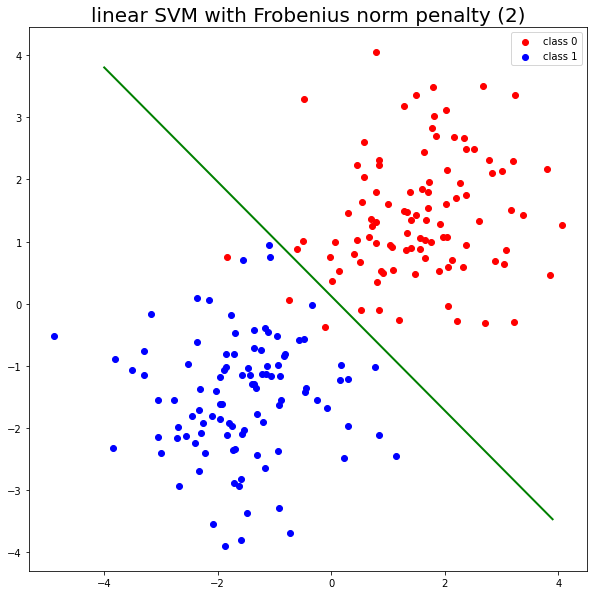

In [13]:
torch.manual_seed(1)

lr = 5e-3  # learning rate

# (2) implement the code by yourself
def frobenius_norm(mat: torch.Tensor) -> torch.Tensor:
    return torch.sqrt(torch.sum(torch.square(mat)))

def loss_fn_2(y, y_hat, w, k=0.001):
    hinge_loss = torch.mean(torch.clamp(1 - y * y_hat, min=0))
    norm = frobenius_norm(w)
    return hinge_loss + k * norm

w = torch.tensor(np.random.normal(0, 0.01, size=(dim, 1)), requires_grad=True, dtype=torch.float32)
b = torch.rand(1, requires_grad=True, dtype=torch.float32)

# train
for iteration in range(1, num_epoch + 1):
    if w.grad is not None:
        w.grad.zero_()
    if b.grad is not None:
        b.grad.zero_()
    y_hat = (torch.mm(x, w) - b).squeeze()
    loss = loss_fn_2(y, y_hat, w)  # hinge loss
    loss.backward()
    w = (w - lr * w.grad).detach().requires_grad_()
    b = (b - lr * b.grad).detach().requires_grad_()
    # print loss
    if iteration % 100 == 0:
        print("epoch: {}, loss: {:.4f}".format(iteration, loss.data.numpy()))
    # early stop
    if loss.data.numpy() < 1e-5:
        break

# plot
plt.figure(figsize=(10, 10))
plt.scatter(x1.data.numpy()[:, 0], x1.data.numpy()[:, 1], c='r', label="class 0")
plt.scatter(x2.data.numpy()[:, 0], x2.data.numpy()[:, 1], c='b', label="class 1")
# line: w1x1 + w2x2 + b = 0 -> x2 = -(w1x1 + b) / w2
w1 = float(w.data.numpy()[0])
w2 = float(w.data.numpy()[1])
b = float(b.data.numpy())
plot_x = np.arange(-4, 4, 0.1)
plot_y = -(w1 * plot_x + b) / w2
plt.plot(plot_x, plot_y, 'g-', lw=2)
plt.title("linear SVM with Frobenius norm penalty (2)", size=20)
plt.legend()
plt.show()

12. Download CIFAR-10 dataset and visualize some of its images.

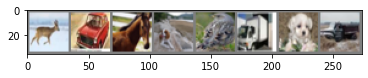

 deer   car horse   dog  bird truck   dog truck


In [14]:
# ref:
# https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

import torchvision
import torchvision.transforms as transforms

torch.manual_seed(1)

DATA_DIR = "/Users/sgallon/data/"
BATCH_SIZE = 8

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root=DATA_DIR, train=True, download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    """
    function to show an image
    """
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    # 因为在plt.imshow在现实的时候输入的是（imagesize,imagesize,channels）,
    # 而plt.imshow(img,text,should_save=False)中，
    # 参数img的格式为（channels,imagesize,imagesize）,
    # 这两者的格式不一致，我们需要调用一次np.transpose函数，
    # 即np.transpose(npimg,(1,2,0))，将npimg的数据格式由（channels,imagesize,imagesize）
    # 转化为（imagesize,imagesize,channels）,进行格式的转换后方可进行显示。
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(BATCH_SIZE)))

13. Write a dataset class for loading CIFAR-10. Make sure it could be transferred to Pytorch Dataloader. The
class should meet the following requirements: (1) Inherit pytorch’s DataSet class; (2) Load the image file and
save in proper way; (3) Override \_\_getitem\_\_ and \_\_len\_\_ methods.

Hint: If you find this part a little hard, check the official code and make sure you understand each part.

In [15]:
# ref:
# https://pytorch.org/vision/0.8/datasets.html#cifar
# https://pytorch.org/vision/0.8/_modules/torchvision/datasets/cifar.html#CIFAR10

import os
import pickle
from PIL import Image
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class CIFAR10Dataset(Dataset):
    base_folder = 'cifar-10-batches-py'
    train_list = ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']
    test_list = ['test_batch']

    def __init__(self, root, train=True, transform=None):
        self.root = root
        self.transform = transform
        if train:
            file_list = self.train_list
        else:
            file_list = self.test_list
        self.data = []
        self.targets = []
        # now load the picked numpy arrays
        for file_name in file_list:
            file_path = os.path.join(self.root, self.base_folder, file_name)
            with open(file_path, 'rb') as f:
                entry = pickle.load(f, encoding='latin1')
                self.data.append(entry['data'])
                if 'labels' in entry:
                    self.targets.extend(entry['labels'])
                else:
                    self.targets.extend(entry['fine_labels'])
        self.data = np.vstack(self.data).reshape(-1, 3, 32, 32)
        self.data = self.data.transpose((0, 2, 3, 1))  # convert to HWC
        self._load_meta()

    def _load_meta(self):
        path = os.path.join(self.root, self.base_folder, 'batches.meta')
        with open(path, 'rb') as infile:
            data = pickle.load(infile, encoding='latin1')
            self.classes = data['label_names']
        self.class_to_idx = {_class: i for i, _class in enumerate(self.classes)}

    def __getitem__(self, index):
        img, target = self.data[index], self.targets[index]
        img = Image.fromarray(img)
        if self.transform is not None:
            img = self.transform(img)
        return img, target

    def __len__(self):
        return len(self.data)

Training set size: 50000
Test set size: 10000
=== Training set data ===
 deer automobile horse   dog  bird truck   dog truck
=== Test set data ===
  cat  ship  ship airplane  frog  frog automobile  frog


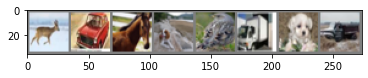

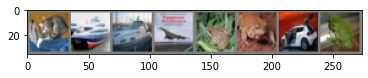

In [16]:
torch.manual_seed(1)

DATA_DIR = "/Users/sgallon/data/"
BATCH_SIZE = 8

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = CIFAR10Dataset(root=DATA_DIR, train=True, transform=transform)
test_data = CIFAR10Dataset(root=DATA_DIR, train=False, transform=transform)

print("Training set size: {}".format(len(train_data)))
print("Test set size: {}".format(len(test_data)))

classes = train_data.classes

train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE)

print("=== Training set data ===")
dataiter = iter(train_loader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(BATCH_SIZE)))

print("=== Test set data ===")
dataiter = iter(test_loader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(BATCH_SIZE)))

14. Run one epoch for loading CIFAR-10 with Pytorch Dataloader and test the loading time of different batch_size
(1, 4, 64, 1024), different num_workers (0,1,4,16), and whether use pin_memory or not.

In [17]:
import time

torch.manual_seed(1)

DATA_DIR = "/Users/sgallon/data/"
BATCH_SIZES = (1, 4, 64, 1024)
NUM_WORKERS = (0, 1, 4, 16)
PIN_MEMORIES = (True, False)

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root=DATA_DIR, train=True, download=False, transform=transform)

for batch_size in BATCH_SIZES:
    for num_worker in NUM_WORKERS:
        for pin_memory in PIN_MEMORIES:
            trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=num_worker, pin_memory=pin_memory)
            start_time = time.time()
            dataiter = iter(trainloader)
            images, labels = dataiter.next()
            end_time = time.time()
            t = end_time - start_time
            print("batch_size: {}, num_workers: {}, pin_memory: {}, time: {:.4f}s".format(batch_size, num_worker, pin_memory, t))


batch_size: 1, num_workers: 0, pin_memory: True, time: 0.0031s
batch_size: 1, num_workers: 0, pin_memory: False, time: 0.0026s
batch_size: 1, num_workers: 1, pin_memory: True, time: 0.0203s
batch_size: 1, num_workers: 1, pin_memory: False, time: 0.0201s
batch_size: 1, num_workers: 4, pin_memory: True, time: 0.0316s
batch_size: 1, num_workers: 4, pin_memory: False, time: 0.0337s
batch_size: 1, num_workers: 16, pin_memory: True, time: 0.1409s
batch_size: 1, num_workers: 16, pin_memory: False, time: 0.1200s
batch_size: 4, num_workers: 0, pin_memory: True, time: 0.0226s
batch_size: 4, num_workers: 0, pin_memory: False, time: 0.0047s
batch_size: 4, num_workers: 1, pin_memory: True, time: 0.0202s
batch_size: 4, num_workers: 1, pin_memory: False, time: 0.0208s
batch_size: 4, num_workers: 4, pin_memory: True, time: 0.0295s
batch_size: 4, num_workers: 4, pin_memory: False, time: 0.0312s
batch_size: 4, num_workers: 16, pin_memory: True, time: 0.0942s
batch_size: 4, num_workers: 16, pin_memory: F

15. Calculate the mean and std of CIFAR-10’ training set within each RGB channel.

In [18]:
# ref:
# https://blog.csdn.net/CVSvsvsvsvs/article/details/94149896

DATA_DIR = "/Users/sgallon/data/"

def get_mean_std(dataset, ratio=0.01):
    """
    Get mean and std with sample ratio
    """
    dataloader = DataLoader(dataset, batch_size=int(len(dataset)*ratio), shuffle=True, num_workers=0)
    data, _ = iter(dataloader).next()  # 一个batch的数据
    mean = np.mean(data.numpy(), axis=(0,2,3))  # shape = (batch_size, 3, 32, 32)
    std = np.std(data.numpy(), axis=(0,2,3))
    return mean, std

trainset = torchvision.datasets.CIFAR10(root=DATA_DIR, train=True, download=False, transform=transforms.ToTensor())
train_mean, train_std = get_mean_std(trainset, ratio=1)
train_mean *= 255
train_std *= 255

print("R: mean: {:.4f}, std: {:.4f}".format(train_mean[0], train_std[0]))
print("G: mean: {:.4f}, std: {:.4f}".format(train_mean[1], train_std[1]))
print("B: mean: {:.4f}, std: {:.4f}".format(train_mean[2], train_std[2]))

R: mean: 125.3070, std: 62.9932
G: mean: 122.9500, std: 62.0886
B: mean: 113.8657, std: 66.7050


16. Numpy exercises
 - Consider a random 10x2 matrix representing cartesian coordinates, convert them to polar coordinates.
 - Create a 2D array subclass such that Z[i, j] == Z[j, i].
 - Consider 2 sets of points P0, P1 describing lines (2d) and a set of points P, how to compute distance
from each point j (P[j]) to each line i (P0[i],P1[i])?

In [19]:
np.random.seed(1)

def cartesian2polar(points):
    epsilon = 1e-100  # prevent overflow
    r = np.linalg.norm(points, axis=1)
    theta = np.arctan(points[:, 1] / (points[:, 0] + epsilon))  # 1st quadrant: arctan(y/x)
    theta += np.pi * (points[:,0] < 0)  # 2nd/3rd quadrant: pi + arctan(y/x)
    theta += 2 * np.pi * ((points[:, 0] > 0) & (points[:, 1] < 0))  # 4th quadrant: 2pi + arctan(y/x)
    polar = np.array((r, theta)).T
    return polar

x = np.random.randn(10, 2)
x_polar = cartesian2polar(x)
print("cartesian:\n", x)
print("polar:\n", x_polar)

cartesian:
 [[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]
 [ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]
 [ 1.46210794 -2.06014071]
 [-0.3224172  -0.38405435]
 [ 1.13376944 -1.09989127]
 [-0.17242821 -0.87785842]
 [ 0.04221375  0.58281521]]
polar:
 [[1.73572572 5.92299757]
 [1.19592101 4.25495836]
 [2.45886371 5.07204714]
 [1.90362918 5.87180875]
 [0.40493398 5.61974668]
 [2.52625006 5.32960381]
 [0.5014485  4.01401692]
 [1.57961829 5.51295309]
 [0.89463226 4.5184389 ]
 [0.584342   1.49849184]]


In [20]:
np.random.seed(1)

def symmetric_matrix(mat):
    shape = mat.shape
    assert len(shape) == 2 and shape[0] == shape[1], "input must be a 2d square matrix"
    l = np.triu(mat)
    return l + l.T - np.diag(mat.diagonal())

x = np.round(np.random.randn(4, 4), 4)
y = symmetric_matrix(x)
print("original:\n", x)
print("symmetric:\n", y)

original:
 [[ 1.6243 -0.6118 -0.5282 -1.073 ]
 [ 0.8654 -2.3015  1.7448 -0.7612]
 [ 0.319  -0.2494  1.4621 -2.0601]
 [-0.3224 -0.3841  1.1338 -1.0999]]
symmetric:
 [[ 1.6243 -0.6118 -0.5282 -1.073 ]
 [-0.6118 -2.3015  1.7448 -0.7612]
 [-0.5282  1.7448  1.4621 -2.0601]
 [-1.073  -0.7612 -2.0601 -1.0999]]


In [21]:
class Line:
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c

    def print_equation(self):
        print("{} * x + {} * y + {} = 0".format(self.a, self.b ,self.c))

    def distance_to_line(self, points):
        shape = points.shape
        assert len(shape) == 2 and shape[1] == 2, "points must be 2d!"
        result = np.abs(self.a * points[:, 0] + self.b * points[:, 1] + self.c) / np.sqrt(self.a ** 2 + self.b ** 2)
        return np.round(result, 4)

    @staticmethod
    def find_line(point1, point2):
        """ax + by + c = 0"""
        x1, y1 = point1
        x2, y2 = point2
        assert not (x1 == x2 and y1 == y2), "two points must be different!"
        a = y2 - y1
        b = x1 - x2
        c = y1 * (x2 - x1) - x1 * (y2 - y1)
        return a, b, c

P = np.array([[0, 0], [1, 0], [0, 1]])
P0 = np.array([[0, 2], [0, 2], [0, 2]])
P1 = np.array([[2, 0], [1, 0], [-1, 0]])

for i in range(len(P0)):
    p0, p1 = P0[i], P1[i]
    a, b, c = Line.find_line(p0, p1)
    line = Line(a, b, c)
    line.print_equation()
    distance = line.distance_to_line(P)
    print(distance)

-2 * x + -2 * y + 4 = 0
[1.4142 0.7071 0.7071]
-2 * x + -1 * y + 2 = 0
[0.8944 0.     0.4472]
-2 * x + 1 * y + -2 = 0
[0.8944 1.7889 0.4472]


17. Bilinear Interpolation

Please implement the bilinear interpolation algorithm using python. Check this for an introduction to bilinear
interpolation.

Test samples:
```
A =
((110, 120, 130),
(210, 220, 230),
(310, 320, 330))
BilinearInterpolation(A, (1, 1)) == 110
BilinearInterpolation(A, (2.5, 2.5)) == 275
```

In [22]:
# ref:
# https://www.cnblogs.com/xpvincent/archive/2013/03/15/2961448.html
# https://www.cnblogs.com/wojianxin/p/12516029.html

def BilinearInterpolation(A, point):
    x, y = point
    x -= 1
    y -= 1
    if x - int(x) < 1e-6 and y - int(y) < 1e-6:  # 本就在格点
        return A[int(x), int(y)]
    elif x - int(x) < 1e-6:  # 在水平边上
        left = int(np.floor(y))
        right = int(np.ceil(y))
        return A[int(x), left] + (A[int(x), right] - A[int(x), left]) * (y - left)
    elif y - int(y) < 1e-6:  # 在垂直边上
        up = int(np.floor(x))
        down = int(np.ceil(x))
        return A[up, int(y)] + (A[down, int(y)] - A[up, int(y)]) * (x - up)
    else:  # 在格点之间
        left = int(np.floor(y))
        right = int(np.ceil(y))
        up = int(np.floor(x))
        down = int(np.ceil(x))
        left_pixel = A[up, left] + (A[down, left] - A[up, left]) * (x - up)
        right_pixel = A[up, right] + (A[down, right] - A[up, right]) * (x - up)
        center_pixel = left_pixel + (right_pixel - left_pixel) * (y - left)
        return center_pixel


A = np.array([[110, 120, 130], [210, 220, 230], [310, 320, 330]])

print(BilinearInterpolation(A, (1, 1)))
print(BilinearInterpolation(A, (2.5, 2.5)))

110
275.0


18. Cartesian product

Given an arbitrary number of vectors, build the cartesian product (every combinations of every item).

e.g. [1, 2, 3], [4, 5], [6, 7] ==> [[1 4 6] [1 4 7] [1 5 6] [1 5 7] [2 4 6] [2 4 7] [2 5 6] [2 5 7] [3 4 6] [3 4 7] [3 5 6] [3 5 7]]

In [23]:
np.random.seed(1)

def cartesian_product(A):
    if len(A) == 1:
        return [[a] for a in A[0]]
    nums = A.pop(0)  # 第一个数组
    post_product = cartesian_product(A)
    result = []
    for num in nums:
        product = []
        for p in post_product:
            product.append([num] + p)
        result.extend(product)
    return result


A = [[1, 2, 3], [4, 5], [6, 7]]
print(cartesian_product(A))

[[1, 4, 6], [1, 4, 7], [1, 5, 6], [1, 5, 7], [2, 4, 6], [2, 4, 7], [2, 5, 6], [2, 5, 7], [3, 4, 6], [3, 4, 7], [3, 5, 6], [3, 5, 7]]


19. Extracting a subpart of an array

Consider an arbitrary array, write a function that extract a subpart with a fixed shape and centered on a
given element (pad with a fill value when necessary)
e.g.
```
In:
> > Z = np.random.randint(0, 10, (5, 5))
> > shape = (4, 4)
> > fill = 0
> > position = (1,1)
> > Z
[[3 6 8 5 9]
[4 9 0 0 9]
[6 1 4 0 8]
[9 1 2 0 9]
[4 1 7 5 0]]
Out:
[[0 0 0 0]
[0 3 6 8]
[0 4 9 0]
[0 6 1 4]]
```

In [24]:
np.random.seed(1)

def extract_subpart(A, shape, position, fill=0):
    assert len(A.shape) == 2, "A must be 2d!"
    n, m = A.shape
    x, y = position[0] - 1, position[1] - 1
    height, width = shape
    left = y - (width - 1) // 2
    right = left + width
    up = x - (height - 1) // 2
    down = up + height
    if 0 <= left and right <= n and 0 <= up and down <= m:  # do not need pad
        return A[up:down, left:right]
    pad_width = max([0, -left, -up, right-m, down-n])
    A = np.pad(A, pad_width=pad_width, mode='constant', constant_values=fill)
    return A[up+pad_width:down+pad_width, left+pad_width:right+pad_width]

Z = np.random.randint(0, 10, (5, 5))
shape = (4, 4)
fill = 0
position = (1,1)
print(Z)
print(extract_subpart(Z, shape, position, fill))

[[5 8 9 5 0]
 [0 1 7 6 9]
 [2 4 5 2 4]
 [2 4 7 7 9]
 [1 7 0 6 9]]
[[0 0 0 0]
 [0 5 8 9]
 [0 0 1 7]
 [0 2 4 5]]


20. Matrix operations
Please implement following matrix (just 2D) operations without numpy:
 - add
 - subtract
 - scalar multiply
 - multiply
 - identity
 - transpose
 - inverse

Test samples:
```
In:
> > matrix_a = [[12, 10], [3, 9]]
> > matrix_b = [[3, 4], [7, 4]]
> > matrix_c = [[11, 12, 13, 14], [21, 22, 23, 24], [31, 32, 33, 34], [41, 42, 43, 44]]
> > matrix_d = [[3, 0, 2], [2, 0, -2], [0, 1, 1]]
Out:
add(matrix_a, matrix_b) == [[15, 14], [10, 13]]
subtract(matrix_a, matrix_b) == [[9, 6], [-4, 5]]
scalar_multiply(matrix_b, 3) == [[9, 12], [21, 12]]
multiply(matrix_a, matrix_b) == [[106, 88], [72, 48]]
identity(3) == [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
transpose(matrix_c) == [[11, 21, 31, 41], [12, 22, 32, 42], [13, 23, 33, 43], [14, 24, 34, 44]]
inverse(matrix_d) == [[0.2, 0.2, 0.0], [-0.2, 0.30000000000000004, 1.0], [0.2, -0.30000000000000004, 0.0]]
```

In [25]:
class MatrixOperations:
    @staticmethod
    def _shape(mat):
        # use numpy just for check input
        return np.array(mat).shape

    @staticmethod
    def _check_dim(mat, dim=2):
        shape = MatrixOperations._shape(mat)
        if len(shape) != dim:
            raise TypeError("data type not match! Must be a 2d array! got shape {}".format(shape))

    @staticmethod
    def add(mat1, mat2):
        MatrixOperations._check_dim(mat1)
        MatrixOperations._check_dim(mat2)
        assert MatrixOperations._shape(mat1) == MatrixOperations._shape(mat2), "Two matrices must have the same shape!"
        n, m = len(mat1), len(mat1[0])
        ret = [[0 for j in range(m)] for i in range(n)]
        for i in range(n):
            for j in range(m):
                ret[i][j] = mat1[i][j] + mat2[i][j]
        return ret

    @staticmethod
    def subtract(mat1, mat2):
        MatrixOperations._check_dim(mat1)
        MatrixOperations._check_dim(mat2)
        assert MatrixOperations._shape(mat1) == MatrixOperations._shape(mat2), "Two matrices must have the same shape!"
        n, m = len(mat1), len(mat1[0])
        ret = [[0 for j in range(m)] for i in range(n)]
        for i in range(n):
            for j in range(m):
                ret[i][j] = mat1[i][j] - mat2[i][j]
        return ret
        # return MatrixOperations.add(mat1, MatrixOperations.scalar_multiply(mat2, -1))

    @staticmethod
    def scalar_multiply(mat, c):
        MatrixOperations._check_dim(mat)
        n, m = len(A), len(A[0])
        ret = [[0 for j in range(m)] for i in range(n)]
        for i in range(n):
            for j in range(m):
                ret[i][j] = c * A[i][j]
        return ret

    @staticmethod
    def multiply(mat1, mat2):
        MatrixOperations._check_dim(mat1)
        MatrixOperations._check_dim(mat2)
        assert MatrixOperations._shape(mat1)[1] == MatrixOperations._shape(mat2)[0], "Illegal matrix shape!"
        n, m, l = len(mat1), len(mat1[0]), len(mat2[0])
        ret = [[0 for j in range(l)] for i in range(n)]  # n*m x m*l => n*l
        for i in range(n):
            for j in range(l):
                for k in range(m):
                    tmp = mat1[i][k] * mat2[k][j]
                    ret[i][j] += tmp
        return ret

    @staticmethod
    def identity(n):
        ret = [[0 for j in range(n)] for i in range(n)]
        for i in range(n):
            ret[i][i] = 1
        return ret

    @staticmethod
    def transpose(mat):
        MatrixOperations._check_dim(mat)
        assert MatrixOperations._shape(mat)[0] == MatrixOperations._shape(mat)[1], "Must be square matrix!"
        n = len(mat)
        ret = [[0 for j in range(n)] for i in range(n)]
        for i in range(n):
            for j in range(n):
              ret[i][j] = mat[j][i]
        return ret

    @staticmethod
    def copy(mat):
        MatrixOperations._check_dim(mat)
        n, m = len(mat), len(mat[0])
        return [[mat[i][j] for j in range(n)] for i in range(n)]

    # ref:
    # https://www.zhihu.com/question/321714698/answer/664724842 (incorrect)
    # https://blog.csdn.net/weixin_39917090/article/details/110837442
    @staticmethod
    def inverse(mat):
        """
        Gauss-Jordan法求逆矩阵
        :param mat: an inversible square matrix
        :return: the inverse matrix
        """
        MatrixOperations._check_dim(mat)
        assert MatrixOperations._shape(mat)[0] == MatrixOperations._shape(mat)[1], "Must be square matrix!"

        def step0(m):
            n = len(m)
            l = []
            for i in range(0,n):
               l.append([])
               for j in range(0,n):
                  if i == j:
                       l[i].append(1)
                  else:
                      l[i].append(0)
            return l

        def step1(m):
            n = len(m)
            """交换操作记录数组 swap"""
            swap = []
            l = []
            for i in range(0,n):
                swap.append(i)
                l.append([])
                for j in range(0,n):
                    l[i].append(0)
            """对每一列进行操作"""
            for i in range(0,n):
                max_row = m[i][i]
                row = i
                for j in range(i,n):
                    if m[j][i] >= max_row:
                        max_row = m[j][i]
                        row = j
                swap[i] = row
                """交换"""
                if row != i:
                    for j in range(0,n):
                        m[i][j],m[row][j] = m[row][j],m[i][j]
                """消元"""
                for j in range(i+1,n):
                    if m[j][i] != 0:
                        l[j][i] = m[j][i] / m[i][i]
                        for k in range(0,n):
                            m[j][k] = m[j][k] - (l[j][i] * m[i][k])
            return (swap,m,l)

        def step2(m):
            n = len(m)
            long = len(m)-1
            l = []
            for i in range(0,n):
                l.append([])
                for j in range(0,n):
                    l[i].append(0)
            for i in range(0,n-1):
                for j in range(0,long-i):
                    if m[long-i-j-1][long-i] != 0 and m[long-i][long-i] != 0:
                        l[long-i-j-1][long-i] = m[long-i-j-1][long-i] / m[long-i][long-i]
                        for k in range(0,n):
                            m[long-i-j-1][k] = m[long-i-j-1][k] - l[long-i-j-1][long-i] * m[long-i][k]
            return (m,l)

        def step3(m):
            n = len(m)
            l = []
            for i in range(0,n):
                l.append(m[i][i])
            return l

        n = len(mat)
        new = step0(mat)
        (swap, matrix1, l1) = step1(mat)
        (matrix2, l2) = step2(matrix1)
        l3 = step3(matrix2)
        for i in range(n):
            if swap[i] != i:
                new[i],new[swap[i]] = new[swap[i]],new[i]
            for j in range(i+1, n):
                for k in range(n):
                    if l1[j][i] != 0:
                        new[j][k] = new[j][k] - l1[j][i] * new[i][k]
        for i in range(n-1):
            for j in range(n-i-1):
                if l2[n-1-i-j-1][n-1-i] != 0:
                    for k in range(0,n):
                        new[n-1-i-j-1][k] = new[n-1-i-j-1][k] - l2[n-1-i-j-1][n-i-1] * new[n-1-i][k]
        for i in range(n):
            for j in range(n):
                new[i][j] = new[i][j] / l3[i]
        return new


matrix_a = [[12, 10], [3, 9]]
matrix_b = [[3, 4], [7, 4]]
matrix_c = [[11, 12, 13, 14], [21, 22, 23, 24], [31, 32, 33, 34], [41, 42, 43, 44]]
matrix_d = [[3, 0, 2], [2, 0, -2], [0, 1, 1]]

print("=== add ===")
print(MatrixOperations.add(matrix_a, matrix_b))
print("=== subtract ===")
print(MatrixOperations.subtract(matrix_a, matrix_b))
print("=== scalar_multiply ===")
print(MatrixOperations.scalar_multiply(matrix_b, 3))
print("=== multiply ===")
print(MatrixOperations.multiply(matrix_a, matrix_b))
print("=== identity ===")
print(MatrixOperations.identity(3))
print("=== transpose ===")
print(MatrixOperations.transpose(matrix_c))
print("=== inverse ===")
print(MatrixOperations.inverse(matrix_d))

=== add ===
[[15, 14], [10, 13]]
=== subtract ===
[[9, 6], [-4, 5]]
=== scalar_multiply ===
[[18, 21]]
=== multiply ===
[[106, 88], [72, 48]]
=== identity ===
[[1, 0, 0], [0, 1, 0], [0, 0, 1]]
=== transpose ===
[[11, 21, 31, 41], [12, 22, 32, 42], [13, 23, 33, 43], [14, 24, 34, 44]]
=== inverse ===
[[0.19999999999999998, 0.20000000000000004, 0.0], [-0.2, 0.30000000000000004, 1.0], [0.2, -0.30000000000000004, -0.0]]


21. Greatest common divisor

Find the greatest common divisor(gcd) of two integers.

Test samples:
 - GCD(3, 5) = 1
 - GCD(6, 3) = 3
 - GCD(-2, 6) = 2
 - GCD(0, 3) = 3

In [26]:
def gcd(a: int, b: int):
    if a == 0:
        return b
    if b == 0:
        return a
    n = min(abs(a), abs(b))
    for i in range(n+1, 0, -1):
        if a % i == 0 and b % i == 0:
            return i

def test_gcd(a: int, b: int):
    print("GCD({}, {}) = {}".format(a, b, gcd(a, b)))

test_gcd(3, 5)
test_gcd(6, 3)
test_gcd(-2, 6)
test_gcd(0, 3)

GCD(3, 5) = 1
GCD(6, 3) = 3
GCD(-2, 6) = 2
GCD(0, 3) = 3


22. Find all consecutive positive number sequences whose sum is N

e.g. 18+19...+22 = 9+10+...+16 = 100

Find all consecutive positive number sequences whose sum is 1000, and report your results.

In [27]:
# ref:
# https://blog.csdn.net/chenhuajie123/article/details/11990827

def consecutive(n: int):
    assert type(n) is int and n > 0, "n must be an positive integer"
    ret = []
    for k in range(1, n//2 + 1):
        if 2 * n % k == 0:  # 由公式k * (2 * i + k - 1) = 2 * n 知道 2 * n 能够被k整除
            tmp = 2 * n // k - k + 1  # k * (2 * i + k - 1) = 2 * n 转换成 i = (2*num / k - k + 1) / 2
            if 0 < tmp < n and tmp % 2 == 0 and tmp//2 != 0:  # 能被2整除且保证第一位不为0
                i = tmp // 2
                ret.append([i+j for j in range(k)])
    return ret

def print_consecutive(n: int):
    ret = consecutive(n)
    if not ret:
        print("No consecutive for {}".format(n))
    else:
        print("{} = ".format(n))
        for lst in ret:
            l = len(lst)
            for i in range(l-1):
                print(lst[i], end=" + ")
            print(lst[l-1])

print_consecutive(100)
print_consecutive(1000)

100 = 
18 + 19 + 20 + 21 + 22
9 + 10 + 11 + 12 + 13 + 14 + 15 + 16
1000 = 
198 + 199 + 200 + 201 + 202
55 + 56 + 57 + 58 + 59 + 60 + 61 + 62 + 63 + 64 + 65 + 66 + 67 + 68 + 69 + 70
28 + 29 + 30 + 31 + 32 + 33 + 34 + 35 + 36 + 37 + 38 + 39 + 40 + 41 + 42 + 43 + 44 + 45 + 46 + 47 + 48 + 49 + 50 + 51 + 52


23. Password checking

A website requires the users to input username and password to register. Write a program to check the validity
of password input by users. Following are the criteria for checking the password:
 - At least 1 letter between [a-z]
 - At least 1 number between [0-9]
 - At least 1 letter between [A-Z]
 - At least 1 character from [$#@]
 - Minimum length of transaction password: 6
 - Maximum length of transaction password: 12

Your program should accept a sequence of comma separated passwords and will check them according to the
above criteria. Passwords that match the criteria are to be printed, each separated by a comma.

e.g.

If the following passwords are given as input to the program: ABd1234@1,a F1#,2w3E*,2We3345
Then, the output of the program should be: ABd1234@1

In [28]:
import string
import re

def is_password_valid(password: str) -> bool:
    if len(password) < 6 or len(password) > 12:
        return False
    valid = True
    patterns = [r"[a-z]", r"[0-9]", r"[A-Z]", r"[$#@]"]
    for pattern in patterns:
        searchObj = re.search(pattern, password)
        if searchObj is None:
            valid = False
            break
    return valid

def print_valid_passwords(passwords: List[str]):
    valid_passwords = [pw for pw in passwords if is_password_valid(pw)]
    print_list(valid_passwords)

def print_list(lst: List, sep=","):
    l = len(lst)
    for i in range(l-1):
        print(lst[i], end=sep)
    print(lst[l-1])


passwords = ["ABd1234@1", "a F1#", "2w3E*", "2We3345"]
print("Passwords:", end=" ")
print_list(passwords)
print("Valid passwords:", end=" ")
print_valid_passwords(passwords)


Passwords: ABd1234@1,a F1#,2w3E*,2We3345
Valid passwords: ABd1234@1


24. Use pytorch to solve three simple UCI(http://archive.ics.uci.edu/ml/index.php) feature based problems(iris,
adult, wine), and report the accuracy of the validation. You can leverage logistic regiression or SVM to tackle
these problems.

iris:http://archive.ics.uci.edu/ml/machine-learning-databases/iris/

adult:http://archive.ics.uci.edu/ml/machine-learning-databases/adult/

wine:http://archive.ics.uci.edu/ml/datasets/Wine

In [59]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd

torch.manual_seed(1)
np.random.seed(1)

class Net(nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super().__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.out = torch.nn.Linear(n_hidden, n_output)

    def forward(self,x):
        x = F.relu(self.hidden(x))
        x = self.out(x)
        return x

# iris

iris_dataset = datasets.load_iris()
x = torch.FloatTensor(iris_dataset['data'])
y = torch.FloatTensor(iris_dataset['target'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle=True, random_state=1)
# x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size=0.5, shuffle=True, random_state=1)
print("train: ", len(x_train))
# print("dev: ", len(x_dev))
print("test: ", len(x_test))

train:  100
test:  50


In [60]:
net = Net(n_feature=4, n_hidden=20, n_output=3)
optimizer = optim.SGD(net.parameters(), lr=0.05)
loss_func = nn.CrossEntropyLoss()

NUM_EPOCH = 500

for i in range(1, NUM_EPOCH+1):
    out = net(x_train)
    loss = loss_func(out, y_train.long())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    predicted = torch.max(out.data,1)[1]
    correct = (predicted == y_train).sum()
    acc = correct / len(y_train)
    if i % 50 == 0:
        print("epoch: {}, loss:{:.6f}, accuracy: {:.3f}".format(i, loss.data.numpy(), acc))

with torch.no_grad():
    out = net(x_test)
    predicted = torch.max(out.data,1)[1]
    correct = (predicted == y_test).sum()
    print("test accuracy: {:.3f}".format(correct / len(y_test)))

epoch: 50, loss:0.450752, accuracy: 0.920
epoch: 100, loss:0.293303, accuracy: 0.970
epoch: 150, loss:0.217515, accuracy: 0.980
epoch: 200, loss:0.196071, accuracy: 0.940
epoch: 250, loss:0.147748, accuracy: 0.980
epoch: 300, loss:0.130587, accuracy: 0.980
epoch: 350, loss:0.119814, accuracy: 0.980
epoch: 400, loss:0.112304, accuracy: 0.980
epoch: 450, loss:0.106817, accuracy: 0.980
epoch: 500, loss:0.102670, accuracy: 0.980
test accuracy: 0.980


In [61]:
# adult
# ref:
# https://blog.csdn.net/weixin_42687826/article/details/103434799

DATA_DIR = "/Users/sgallon/data/adult/"

train_data = pd.read_csv(DATA_DIR + 'adult.data', header=None)
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [62]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [63]:
row = train_data[0:1]
d = dict()
for index in row:
    temp = row[index]
    if temp.dtype != int:
        keys = list(set(train_data[index]))
        values = range(len(keys))
        d.update(dict(zip(keys, values)))
        # print(dict(zip(keys, values)))
        # for index_col in data[index].keys():
        #     data.loc[index_col, index] = d[data[index][index_col]]

train_data = train_data.applymap(lambda x: d[x] if type(x) != int else x)
d.update({' <=50K.': d[' <=50K'], ' >50K.': d[' >50K']})
# print(d)
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,3,77516,8,13,0,7,4,4,0,2174,0,40,12,1
1,50,2,83311,8,13,4,6,5,4,0,0,0,13,12,1
2,38,0,215646,12,9,2,13,4,4,0,0,0,40,12,1
3,53,0,234721,0,7,4,13,5,0,0,0,0,40,12,1
4,28,0,338409,8,13,4,5,1,0,1,0,0,40,30,1


In [64]:
test_data = pd.read_csv(DATA_DIR + 'adult.test', header=None, skiprows=1)
test_data = test_data.applymap(lambda x: d[x] if type(x) != int else x)
test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,0,226802,0,7,0,0,0,0,0,0,0,40,12,1
1,38,0,89814,12,9,4,12,5,4,0,0,0,50,12,1
2,28,6,336951,3,12,4,9,5,4,0,0,0,40,12,0
3,44,0,160323,7,10,4,0,5,0,0,7688,0,40,12,0
4,18,26,103497,7,10,0,26,0,4,1,0,0,30,12,1


In [65]:
train_data = torch.from_numpy(np.array(train_data))
test_data = torch.from_numpy(np.array(test_data))
x_train = train_data[:, 0:14]
y_train = train_data[:, 14]
x_test = test_data[:, 0:14]
y_test = test_data[:, 14]

In [68]:
torch.manual_seed(1)
np.random.seed(1)

net = Net(n_feature=14, n_hidden=20, n_output=2)
optimizer = optim.Adam(net.parameters(), lr=0.005)
loss_func = nn.CrossEntropyLoss()

NUM_EPOCH = 500

for i in range(1, NUM_EPOCH+1):
    out = net(x_train.float())
    loss = loss_func(out, y_train.long())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    predicted = torch.max(out.data,1)[1]
    correct = (predicted == y_train).sum()
    acc = correct / len(y_train)
    if i % 50 == 0:
        print("epoch: {}, loss:{:.6f}, accuracy: {:.3f}".format(i, loss.data.numpy(), acc))

with torch.no_grad():
    out = net(x_test.float())
    predicted = torch.max(out.data,1)[1]
    correct = (predicted == y_test).sum()
    print("test accuracy: {:.3f}".format(correct / len(y_test)))

epoch: 50, loss:56.451859, accuracy: 0.786
epoch: 100, loss:191.160965, accuracy: 0.789
epoch: 150, loss:35.115280, accuracy: 0.785
epoch: 200, loss:125.193306, accuracy: 0.789
epoch: 250, loss:118.734200, accuracy: 0.790
epoch: 300, loss:118.965752, accuracy: 0.791
epoch: 350, loss:118.620888, accuracy: 0.791
epoch: 400, loss:115.702187, accuracy: 0.792
epoch: 450, loss:76.044533, accuracy: 0.795
epoch: 500, loss:108.533882, accuracy: 0.787
test accuracy: 0.785


In [70]:
# wine

DATA_DIR = "/Users/sgallon/data/wine/"

data = pd.read_csv(DATA_DIR + "wine.data", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    int64  
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    int64  
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [72]:
x_data=data.iloc[:,1:]
y_data=data.iloc[:,0]

In [83]:
x = torch.from_numpy(np.array(x_data))
y = torch.from_numpy(np.array(y_data))
# print(y)
y = y.sub_(torch.ones(y.shape).long())
# print(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=1)
print("test: ", len(x_train))
print("test: ", len(x_test))

test:  142
test:  36


In [84]:
torch.manual_seed(1)
np.random.seed(1)

net = Net(n_feature=13, n_hidden=20, n_output=3)
optimizer = optim.Adam(net.parameters(), lr=0.005)
loss_func = nn.CrossEntropyLoss()

NUM_EPOCH = 500

for i in range(1, NUM_EPOCH+1):
    out = net(x_train.float())
    loss = loss_func(out, y_train.long())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    predicted = torch.max(out.data,1)[1]
    correct = (predicted == y_train).sum()
    acc = correct / len(y_train)
    if i % 50 == 0:
        print("epoch: {}, loss:{:.6f}, accuracy: {:.3f}".format(i, loss.data.numpy(), acc))

with torch.no_grad():
    out = net(x_test.float())
    predicted = torch.max(out.data,1)[1]
    correct = (predicted == y_test).sum()
    print("test accuracy: {:.3f}".format(correct / len(y_test)))

epoch: 50, loss:0.999809, accuracy: 0.556
epoch: 100, loss:0.471154, accuracy: 0.887
epoch: 150, loss:0.386224, accuracy: 0.901
epoch: 200, loss:0.324598, accuracy: 0.930
epoch: 250, loss:0.277227, accuracy: 0.944
epoch: 300, loss:0.239996, accuracy: 0.944
epoch: 350, loss:0.211231, accuracy: 0.951
epoch: 400, loss:0.188728, accuracy: 0.951
epoch: 450, loss:0.170734, accuracy: 0.951
epoch: 500, loss:0.156121, accuracy: 0.951
test accuracy: 0.917


25. Use Cats and Dogs dataset to train a DL model in https://www.kaggle.com/tongpython/cat-and-dog/code,
provide the training code and accuracy of the validation.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
from tqdm import tqdm

DATA_DIR = "/home/jupyter/sjl/cats-and-dogs/"

In [11]:
# ref:
# https://www.kaggle.com/manzoormahmood/transfer-learning-using-resnet50-and-pytorch

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

data_transforms = {
    'train':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize
    ]),
    'validation':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        normalize
    ]),
}

image_datasets = {
    'train':
    datasets.ImageFolder(DATA_DIR + 'training_set/training_set', data_transforms['train']),
    'validation':
    datasets.ImageFolder(DATA_DIR + 'test_set/test_set', data_transforms['validation'])
}


dataloaders = {
    'train':
    torch.utils.data.DataLoader(image_datasets['train'],
                                batch_size=32,
                                shuffle=True,
                                num_workers=0),  # for Kaggle
    'validation':
    torch.utils.data.DataLoader(image_datasets['validation'],
                                batch_size=32,
                                shuffle=False,
                                num_workers=0)  # for Kaggle
}

In [12]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [20]:
# Transfer Learning using Resnet50

torch.manual_seed(1)
np.random.seed(1)

model = models.resnet50(pretrained=True).to(device)

for param in model.parameters():
   param.requires_grad = False

model.fc = nn.Sequential(
               nn.Linear(2048, 128),
               nn.ReLU(inplace=True),
               nn.Linear(128, 2)).to(device)

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters())

In [15]:
# Training

def train_model(model, criterion, optimizer, num_epochs=3):
    for epoch in tqdm(range(num_epochs)):
        # print('Epoch {}/{}'.format(epoch+1, num_epochs))
        # print('-' * 10)
        for phase in ['train']:
            if phase == 'train':
                model.train()
            else:
                model.eval()
            running_loss = 0.0
            running_corrects = 0
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                if phase == 'train':
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
                _, preds = torch.max(outputs, 1)
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            epoch_loss = running_loss / len(image_datasets[phase])
            epoch_acc = running_corrects.double() / len(image_datasets[phase])
            print('{} loss: {:.4f}, acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
    return model

In [22]:
model_trained = train_model(model, criterion, optimizer, num_epochs=20)

  5%|▌         | 1/20 [00:34<10:54, 34.47s/it]

train loss: 0.1230, acc: 0.9503


 10%|█         | 2/20 [01:07<10:09, 33.88s/it]

train loss: 0.0885, acc: 0.9643


 15%|█▌        | 3/20 [01:41<09:34, 33.81s/it]

train loss: 0.0955, acc: 0.9644


 20%|██        | 4/20 [02:15<08:59, 33.69s/it]

train loss: 0.0683, acc: 0.9738


 25%|██▌       | 5/20 [02:48<08:21, 33.43s/it]

train loss: 0.0890, acc: 0.9648


 30%|███       | 6/20 [03:21<07:49, 33.57s/it]

train loss: 0.0659, acc: 0.9755


 35%|███▌      | 7/20 [03:55<07:14, 33.45s/it]

train loss: 0.0667, acc: 0.9733


 40%|████      | 8/20 [04:28<06:42, 33.52s/it]

train loss: 0.0780, acc: 0.9700


 45%|████▌     | 9/20 [05:02<06:08, 33.54s/it]

train loss: 0.0645, acc: 0.9741


 50%|█████     | 10/20 [05:35<05:35, 33.53s/it]

train loss: 0.0568, acc: 0.9771


 55%|█████▌    | 11/20 [06:10<05:03, 33.74s/it]

train loss: 0.0704, acc: 0.9735


 60%|██████    | 12/20 [06:43<04:29, 33.73s/it]

train loss: 0.0613, acc: 0.9773


 65%|██████▌   | 13/20 [07:17<03:55, 33.64s/it]

train loss: 0.0616, acc: 0.9749


 70%|███████   | 14/20 [07:50<03:21, 33.54s/it]

train loss: 0.0611, acc: 0.9775


 75%|███████▌  | 15/20 [08:23<02:47, 33.48s/it]

train loss: 0.0547, acc: 0.9784


 80%|████████  | 16/20 [08:57<02:14, 33.62s/it]

train loss: 0.0610, acc: 0.9759


 85%|████████▌ | 17/20 [09:31<01:40, 33.48s/it]

train loss: 0.0536, acc: 0.9789


 90%|█████████ | 18/20 [10:05<01:07, 33.67s/it]

train loss: 0.0607, acc: 0.9754


 95%|█████████▌| 19/20 [10:38<00:33, 33.61s/it]

train loss: 0.0536, acc: 0.9778


100%|██████████| 20/20 [11:11<00:00, 33.59s/it]

train loss: 0.0624, acc: 0.9749


In [23]:
!mkdir models

In [24]:
torch.save(model_trained.state_dict(), './models/cats-and-dogs-weights.h5')

In [25]:
model = models.resnet50(pretrained=False).to(device)
model.fc = nn.Sequential(
               nn.Linear(2048, 128),
               nn.ReLU(inplace=True),
               nn.Linear(128, 2)).to(device)
model.load_state_dict(torch.load('./models/cats-and-dogs-weights.h5'))

<All keys matched successfully>

In [26]:
# Showing some sample images

# validation
validation_img_paths = ["test_set/test_set/cats/cat.4001.jpg",
                        "test_set/test_set/cats/cat.4003.jpg",
                        "test_set/test_set/dogs/dog.4004.jpg",
                        "test_set/test_set/dogs/dog.4006.jpg"]
img_list = [Image.open(DATA_DIR + img_path) for img_path in validation_img_paths]

In [27]:
validation_batch = torch.stack([data_transforms['validation'](img).to(device)
                                for img in img_list])

In [28]:
pred_logits_tensor = model(validation_batch)
print(pred_logits_tensor)

tensor([[ 3.2207, -4.0022],
        [ 5.7197, -7.3605],
        [-5.0508,  5.2448],
        [-6.5268,  7.3181]], device='cuda:0', grad_fn=<AddmmBackward>)


In [29]:
pred_probs = F.softmax(pred_logits_tensor, dim=1).cpu().data.numpy()
print(pred_probs)

[[9.9927086e-01 7.2910084e-04]
 [9.9999797e-01 2.0860055e-06]
 [3.3780496e-05 9.9996626e-01]
 [9.7105101e-07 9.9999905e-01]]


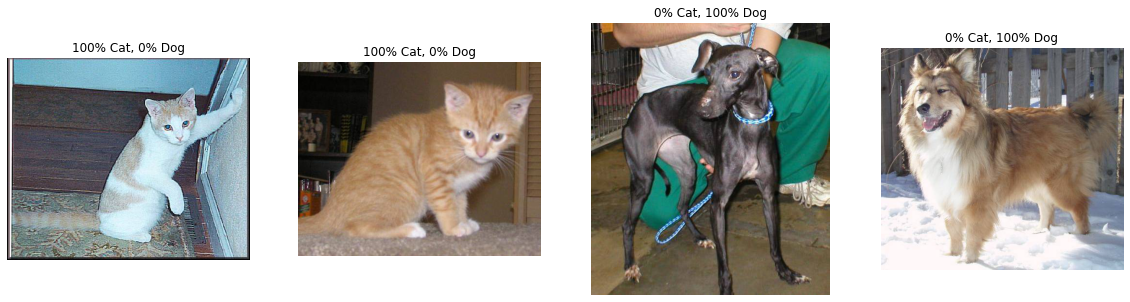

In [30]:
fig, axs = plt.subplots(1, len(img_list), figsize=(20, 5))
for i, img in enumerate(img_list):
    ax = axs[i]
    ax.axis('off')
    ax.set_title("{:.0f}% Cat, {:.0f}% Dog".format(100*pred_probs[i,0],
                                                            100*pred_probs[i,1]))
    ax.imshow(img)

In [31]:
# test

def test_model(model, criterion, optimizer, num_epochs=1):
    labels_input=[]
    labels_output=[]
    for phase in ['validation']:
        model.eval()
        running_loss = 0.0
        running_corrects = 0
        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)
            labels_input.append(labels)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            labels_output.append(preds)
    return labels_input, labels_output

labels_input, labels_output = test_model(model, criterion, optimizer, num_epochs=1)

In [33]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

y_pred = torch.cat(labels_output)
y_pred = y_pred.cpu().numpy()

y_true = torch.cat(labels_input)
y_true = y_true.cpu().numpy()

acc = (y_pred == y_true).sum() / len(y_true)
print("Test accuracy: {:.4f}".format(acc))

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

Test accuracy: 0.9876
Confusion Matrix:
[[ 993   18]
 [   7 1005]]
